Task 1

Importing the data: Looping Through each file and storing it in a DataFrame

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

DATA_PATH = './data/DayAheadPrices_12.1.D'

pattern = f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv'

data = []

for file in glob.glob(pattern):
    df = pd.read_csv(file, sep = '\t', parse_dates= ['DateTime'])
    data.append(df)

df= pd.concat(data, axis = 0)

Filter out unneccesairy data: Filter data to keep only hourly (PT60M) records for Southern Norway (NO2) and Germany (DE_LU) 

In [4]:
df_filtered = df.query("MapCode in ['NO2', 'DE_LU'] and ResolutionCode == 'PT60M'")

# Reshape data to create separate columns for each price zone and rename columns for clarity
df_reshaped = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')  
df_reshaped.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_reshaped.columns]

df_filtered = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]

# Reshape the data
df_pivot = df_filtered.pivot(index='DateTime', columns='MapCode', values='Price')                   
df_pivot.columns = ['NO2 Price' if col == 'NO2' else 'Germany Price' for col in df_pivot.columns]

nordlink_opening_date = pd.to_datetime('2020-12-09') # Define Nordlink Opening time

Plotting the information into a graph:

NameError: name 'df_pivot' is not defined

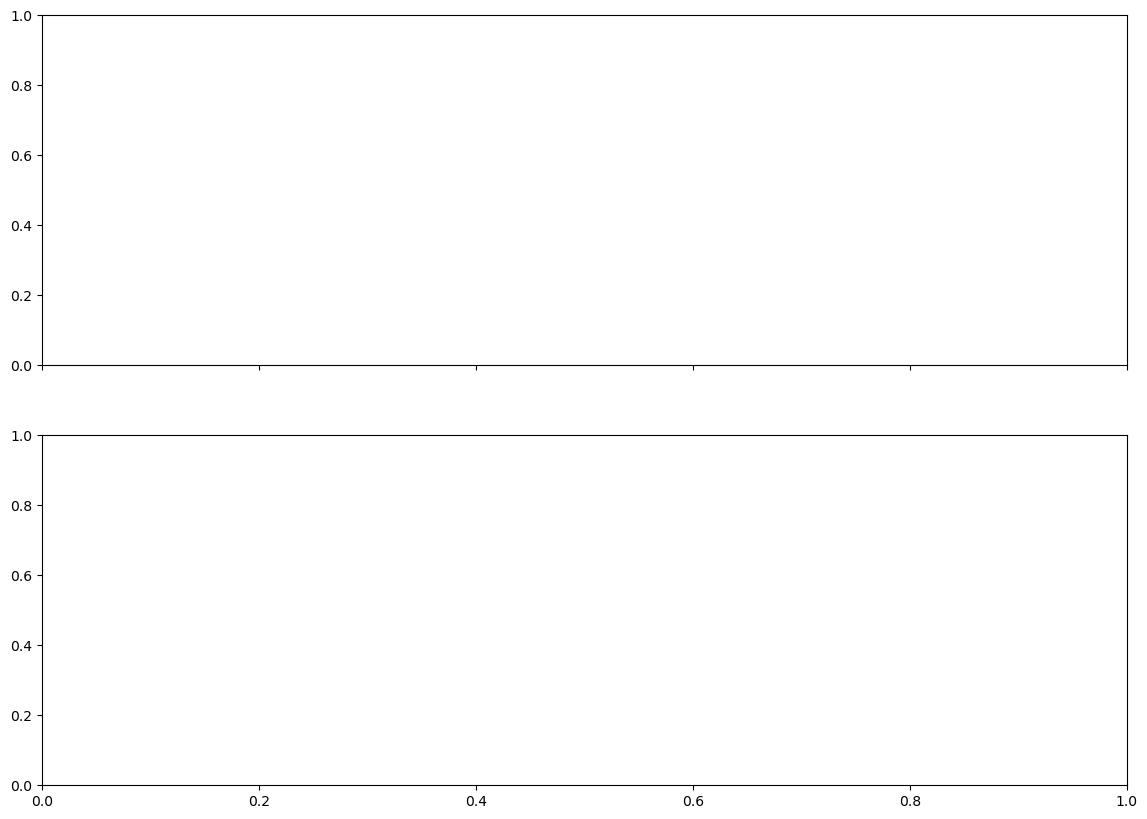

In [ ]:
import matplotlib.pyplot as plt

# Create the main figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Define the average price for the horizontal line (example value)
average_price_no2 = 600  # Adjust as needed
average_price_germany = 600  # Adjust as needed

# NO2 Price Plot
ax1.plot(df_pivot.index, df_pivot['NO2 Price'], label='Hourly Price', color='royalblue', alpha=0.6)
ax1.axvline(nordlink_opening_date, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
ax1.text(nordlink_opening_date, 700, 'Nordlink Opening\nDec 9, 2020', color='red', ha='left', va='center', fontsize=10, backgroundcolor='white')

# Add a horizontal line for average price
ax1.axhline(average_price_no2, color='orange', linestyle='-', linewidth=1.5, alpha=0.8, label='Average Price (NO2)')
ax1.set_title("NO2 Electricity Price (Southern Norway)", fontsize=14, fontweight='bold')
ax1.set_ylabel("Price (EUR/MWh)", fontsize=12)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Germany Price Plot
ax2.plot(df_pivot.index, df_pivot['Germany Price'], label='Hourly Price', color='darkgreen', alpha=0.6)
ax2.axvline(nordlink_opening_date, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
ax2.text(nordlink_opening_date, 700, 'Nordlink Opening\nDec 9, 2020', color='red', ha='left', va='center', fontsize=10, backgroundcolor='white')

# Add a horizontal line for average price
ax2.axhline(average_price_germany, color='orange', linestyle='-', linewidth=1.5, alpha=0.8, label='Average Price (Germany)')
ax2.set_title("Germany Electricity Price", fontsize=14, fontweight='bold')
ax2.set_ylabel("Price (EUR/MWh)", fontsize=12)
ax2.set_xlabel("Date", fontsize=12)
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


#####  **Conclusion**


From the graphs you can see that the electricity prices are relatively the same most of the time. With the opening of Norlink December 9. 2020 that the prices increased rapidly afterwards. Reason for why we sometimes can observe negative electricity prices is when the supply exceeds the demand, and therefore creating a surplus of energy. 